# Reinforcement Learning Simulation in OpenAI Gym Environment

## 1. CartPole-v1

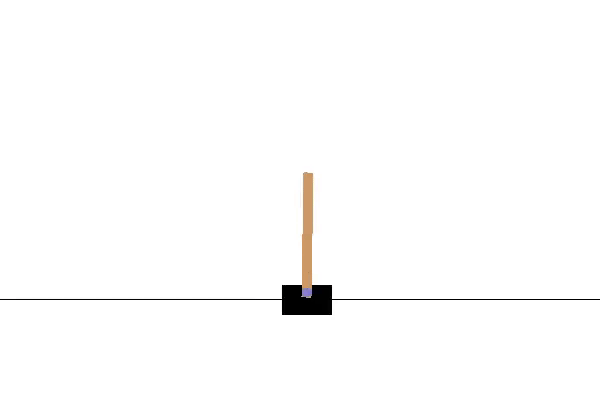

In [3]:
import gym 
import random
import math
import time
import numpy as np
import pandas as pd
from IPython.display import clear_output

env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)
print(env.observation_space)
print(env.action_space)

Box(4,)
Discrete(2)


In [4]:
class Agent():
    def __init__(self, env):
        self.is_discrete = type(env.action_space) == gym.spaces.discrete.Discrete
        self.env_discrete = type(env.observation_space) == gym.spaces.discrete.Discrete
        
        if self.is_discrete:
            self.action_size = env.action_space.n
            print("||Action-Space|| = {}".format(self.action_size))
        else:
            self.action_low = env.action_space.low
            self.action_high = env.action_space.high
            self.action_shape = env.action_space.shape
            print("||Action-Space|| range:", self.action_low, self.action_high)
            
        if self.env_discrete:
            self.state_size = env.observation_space.n
            print("||State-Space|| = {}".format(self.state_size))
        else:
            self.state_low = env.observation_space.low
            self.state_high = env.observation_space.high
            self.state_shape = env.observation_space.shape
            print("||State-Space|| range:", self.state_low, self.state_high)      
        
        self.states = env.observation_space
        self.actions = env.action_space        
    
    def get_action_random(self, state):
        if self.is_discrete:
            action = random.choice(range(self.action_size))
        else:
            action = np.random.uniform(self.action_low, self.action_high, self.action_shape)
        return action
    
    def get_action(self, state):
        pole_angle = state[2]
        action = 0 if pole_angle < 0 else 1
        return action
    
myagent = Agent(env)

||Action-Space|| = 2
||State-Space|| range: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [5]:
n = int(input("Enter the no. of episodes for simulation: "))

for episode in range(n):
    state = env.reset()
    for t in range(10000):
        env.render()
        print("In State: ", state)
        action = myagent.get_action(state)
        state, reward, done, info = env.step(action)
        if done:
            print("Episode {} done in {} timesteps!\n".format(episode+1, t+1))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(episode+1, t+1))
    
env.close()   

Enter the no. of episodes for simulation: 5
In State:  [-0.02461439 -0.04156793  0.02483928 -0.04626993]
In State:  [-0.02544574  0.1531892   0.02391388 -0.3310135 ]
In State:  [-0.02238196  0.34796273  0.01729361 -0.61606025]
In State:  [-0.01542271  0.54283885  0.0049724  -0.90324666]
In State:  [-0.00456593  0.73789309 -0.01309253 -1.19436253]
In State:  [ 0.01019193  0.54294311 -0.03697978 -0.90581171]
In State:  [ 0.0210508   0.34834089 -0.05509601 -0.62497752]
In State:  [ 0.02801761  0.15402963 -0.06759556 -0.35014294]
In State:  [ 0.03109821 -0.04006914 -0.07459842 -0.07951765]
In State:  [ 0.03029682 -0.23404682 -0.07618878  0.18872805]
In State:  [ 0.02561589 -0.42800076 -0.07241421  0.45643715]
In State:  [ 0.01705587 -0.6220282  -0.06328547  0.72544438]
In State:  [ 0.00461531 -0.81622061 -0.04877658  0.99755636]
In State:  [-0.0117091  -1.01065766 -0.02882546  1.27453042]
In State:  [-0.03192226 -1.20540028 -0.00333485  1.55804949]
In State:  [-0.05603026 -1.40048214  0.02

In State:  [-0.01912827 -0.81039876  0.00277542  1.14602335]
In State:  [-0.03533625 -0.61531316  0.02569588  0.85421206]
In State:  [-0.04764251 -0.42055068  0.04278012  0.56971854]
In State:  [-0.05605352 -0.226054    0.0541745   0.29081396]
In State:  [-0.0605746  -0.03174469  0.05999077  0.01569711]
In State:  [-0.0612095   0.1624679   0.06030472 -0.25747101]
In State:  [-0.05796014  0.35667937  0.0551553  -0.53053983]
In State:  [-0.05082655  0.55098385  0.0445445  -0.8053459 ]
In State:  [-0.03980688  0.74546777  0.02843758 -1.08369065]
In State:  [-0.02489752  0.94020316  0.00676377 -1.36731611]
In State:  [-0.00609346  1.1352398  -0.02058255 -1.65787584]
In State:  [ 0.01661134  0.9403638  -0.05374007 -1.3716746 ]
In State:  [ 0.03541862  0.74595352 -0.08117356 -1.09627215]
In State:  [ 0.05033769  0.55198885 -0.10309901 -0.830122  ]
In State:  [ 0.06137746  0.35841587 -0.11970145 -0.57156176]
In State:  [ 0.06854578  0.16515785 -0.13113268 -0.31885731]
In State:  [ 0.07184894 

## Q Learning

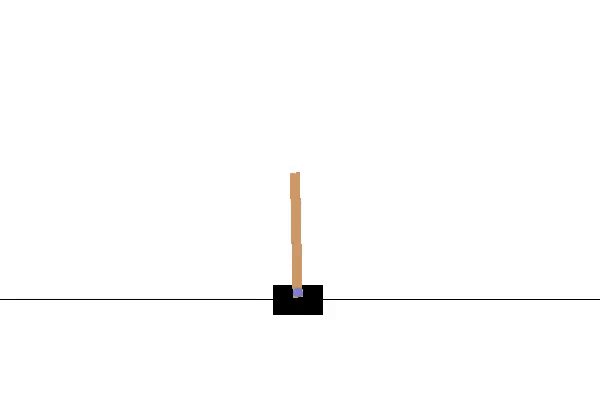

In [8]:
env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)

class QLAgent(Agent):
    def __init__(self, env, size=(1, 1, 6, 12,), discount_rate=0.97, learning_rate=0.01):
        super().__init__(env)        
        
        self.eps = 1.0
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        
        self.state_size = size
        
        self.q_table = 1e-4*np.zeros(self.state_size + (self.action_size,))
        print("QTable constructed with size: {}".format(self.q_table.size))
        
    def discretize(self, state):
        upper_bounds = [self.state_high[0], 0.5, self.state_high[2], math.radians(50)]
        lower_bounds = [self.state_low[0], -0.5, self.state_low[2], -math.radians(50)]
        ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
        new_obs = [int(round((self.state_size[i] - 1) * ratios[i])) for i in range(len(state))]
        new_obs = [min(self.state_size[i] - 1, max(0, new_obs[i])) for i in range(len(state))]
        return tuple(new_obs)       
        
    def get_action(self, state): #epsilon greedy policy
        state = self.discretize(state)
        q_state = self.q_table[state]
        action_greedy = np.argmax(q_state)
        action_random = super().get_action_random(state)
        return action_random if random.random() < self.eps else action_greedy  
    
    def train(self, experience):
        state, action, next_state, reward, done = experience
        state = self.discretize(state)
        next_state = self.discretize(next_state)
        
        q_next = self.q_table[next_state]
        q_next = np.zeros([self.action_size]) if done else q_next
        q_target = reward + self.discount_rate * np.max(q_next)
        #print((*state,action))
        q_update = q_target - self.q_table[(*state,action)]      #Like TD error
        self.q_table[(*state,action)] += self.learning_rate * q_update #Like TD update
        
        if done:
            self.eps = self.eps * 0.99
        
myagent = QLAgent(env)

||Action-Space|| = 2
||State-Space|| range: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
QTable constructed with size: 144


In [9]:
n = int(input("Enter the no. of episodes for simulation: "))

total_reward = 0
for ep in range(n):
    state = env.reset()
    for t in range(10000):
        env.render()        
        action = myagent.get_action(state)
        next_state, reward, done, info = env.step(action)     
        
        myagent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        #print("In State: ", state)   
        #print("In State (Discrete): ", myagent.discretize(state), "Action: ", action)       
        #print("Episode: {}, Total reward: {}, eps: {}".format(ep,total_reward,myagent.eps))
        #print(myagent.q_table)
        #time.sleep(0.05)
        #clear_output(wait=True)
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, myagent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))  
    
env.close()   

Enter the no. of episodes for simulation: 10
Episode 1 done in 13 timesteps! Total reward: 13.0, eps: 0.99

Episode 2 done in 33 timesteps! Total reward: 46.0, eps: 0.9801

Episode 3 done in 21 timesteps! Total reward: 67.0, eps: 0.9702989999999999

Episode 4 done in 24 timesteps! Total reward: 91.0, eps: 0.96059601

Episode 5 done in 36 timesteps! Total reward: 127.0, eps: 0.9509900498999999

Episode 6 done in 53 timesteps! Total reward: 180.0, eps: 0.9414801494009999

Episode 7 done in 12 timesteps! Total reward: 192.0, eps: 0.9320653479069899

Episode 8 done in 33 timesteps! Total reward: 225.0, eps: 0.92274469442792

Episode 9 done in 23 timesteps! Total reward: 248.0, eps: 0.9135172474836407

Episode 10 done in 17 timesteps! Total reward: 265.0, eps: 0.9043820750088043



In [8]:
print(myagent.q_table)

[[[[[0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]]

   [[0.15234051 0.25087245]
    [0.08871926 0.02336006]
    [0.01       0.03233699]
    [0.07782855 0.01      ]
    [0.02028694 0.02009768]
    [0.04968298 0.010097  ]
    [0.03027899 0.        ]
    [0.03969111 0.01038689]
    [0.         0.03076871]
    [0.02001517 0.        ]
    [0.02450818 0.        ]
    [0.         0.        ]]

   [[0.96848375 0.55191832]
    [0.20574224 0.62882707]
    [0.18770265 0.60231248]
    [0.24004139 0.40248881]
    [0.30558492 0.15055859]
    [0.90042061 0.40358814]
    [0.40604021 0.22432   ]
    [0.36279301 0.86574965]
    [0.11825322 0.04884841]
    [0.10127722 0.30745696]
    [0.08603051 0.02323985]
    [0.35701015 

In [10]:
print(myagent.q_table)

[[[[[0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]
    [0.         0.        ]]

   [[0.17751685 0.45650439]
    [0.13652711 0.02336006]
    [0.01       0.07219514]
    [0.11512372 0.02113971]
    [0.03037778 0.03033201]
    [0.04968298 0.02093554]
    [0.03027899 0.0108463 ]
    [0.03969111 0.01038689]
    [0.         0.03076871]
    [0.02001517 0.        ]
    [0.02450818 0.        ]
    [0.         0.        ]]

   [[1.428104   0.67089683]
    [0.28537093 1.17610319]
    [0.23834355 0.87968056]
    [0.27687906 0.6420026 ]
    [0.55152815 0.17934761]
    [2.19932997 0.59671124]
    [1.02580013 0.46171566]
    [0.56693842 2.24316158]
    [0.30893827 0.10906512]
    [0.17879325 0.57339756]
    [0.27259237 0.03513686]
    [0.52611707 

## Larger Q-Table

>1. During Training
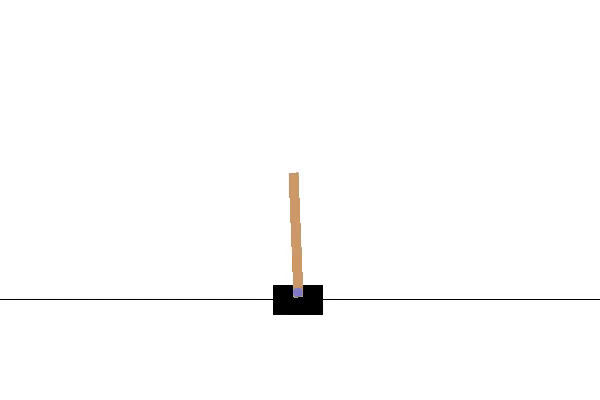

>2. After Training for 100 episodes
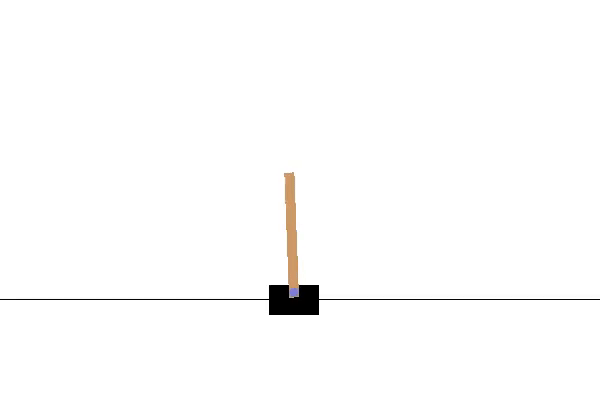

In [11]:
env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/',video_callable=lambda episode_id: True, force = True)

myagent = QLAgent(env, size=(2, 2, 24, 48,), discount_rate=0.97, learning_rate=0.01)

n = int(input("Enter the no. of episodes for simulation: "))

total_reward = 0
for ep in range(n):
    state = env.reset()
    for t in range(10000):
        env.render()        
        action = myagent.get_action(state)
        next_state, reward, done, info = env.step(action)     
        
        myagent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        #print("In State: ", state)   
        #print("In State (Discrete): ", myagent.discretize(state), "Action: ", action)       
        #print("Episode: {}, Total reward: {}, eps: {}".format(ep,total_reward,myagent.eps))
        #print(myagent.q_table)
        #time.sleep(0.05)
        #clear_output(wait=True)
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, myagent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))  
    
env.close()   

||Action-Space|| = 2
||State-Space|| range: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
QTable constructed with size: 9216
Enter the no. of episodes for simulation: 100
Episode 1 done in 28 timesteps! Total reward: 28.0, eps: 0.99

Episode 2 done in 22 timesteps! Total reward: 50.0, eps: 0.9801

Episode 3 done in 18 timesteps! Total reward: 68.0, eps: 0.9702989999999999

Episode 4 done in 18 timesteps! Total reward: 86.0, eps: 0.96059601

Episode 5 done in 12 timesteps! Total reward: 98.0, eps: 0.9509900498999999

Episode 6 done in 21 timesteps! Total reward: 119.0, eps: 0.9414801494009999

Episode 7 done in 9 timesteps! Total reward: 128.0, eps: 0.9320653479069899

Episode 8 done in 28 timesteps! Total reward: 156.0, eps: 0.92274469442792

Episode 9 done in 20 timesteps! Total reward: 176.0, eps: 0.9135172474836407

Episode 10 done in 18 timesteps! Total reward: 194.0, eps: 0.9043820750088043

Episode 11 done 